# SST visualisation

- Global SST
- El Niño 3.4
- IOD


using data downloaded from `sst_download.ipynb` notebook. These are mean daily SST data.
- For code see W1D2T1 (some modifications)

In [2]:
print("Aupa Donostiarra!!!!")

Aupa Donostiarra!!!!


In [3]:
# import libraries

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pythia_datasets import DATASETS
import cartopy.io.shapereader as shapereader
import pandas as pd
import matplotlib.dates as mdates

from warnings import filterwarnings
filterwarnings('ignore')


In [4]:
# Load SST and areacello data

# get SST data and sort out missing values
# sst_data = xr.open_mfdataset("combined_data_test.nc")
# sst_data = xr.open_mfdataset("sst1981_2023.nc")
SST = xr.open_mfdataset("sst1981_2023.nc")['sst']
SST

<xarray.DataArray 'sst' (time: 15399, lat: 720, lon: 1440)>
dask.array<open_dataset-sst, shape=(15399, 720, 1440), dtype=float32, chunksize=(15399, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [5]:
# subset data for Nino34  # NB. longitude values are in degrees east
SST_Nino34 = SST.sel(lat=slice(-5, 5), lon=slice(190, 240)) 
SST_Nino34

<xarray.DataArray 'sst' (time: 15399, lat: 40, lon: 200)>
dask.array<getitem, shape=(15399, 40, 200), dtype=float32, chunksize=(15399, 40, 200), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -4.875 -4.625 -4.375 -4.125 ... 4.375 4.625 4.875
  * lon      (lon) float32 190.1 190.4 190.6 190.9 ... 239.1 239.4 239.6 239.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [6]:
SST_IOD_E = SST.sel(lat=slice(-10,0), lon=slice(90,110))
SST_IOD_E

<xarray.DataArray 'sst' (time: 15399, lat: 40, lon: 80)>
dask.array<getitem, shape=(15399, 40, 80), dtype=float32, chunksize=(15399, 40, 80), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -9.875 -9.625 -9.375 -9.125 ... -0.625 -0.375 -0.125
  * lon      (lon) float32 90.12 90.38 90.62 90.88 ... 109.1 109.4 109.6 109.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [7]:
SST_IOD_W = SST.sel(lat=slice(-10,10), lon=slice(50,70))
SST_IOD_W

<xarray.DataArray 'sst' (time: 15399, lat: 80, lon: 80)>
dask.array<getitem, shape=(15399, 80, 80), dtype=float32, chunksize=(15399, 80, 80), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -9.875 -9.625 -9.375 -9.125 ... 9.375 9.625 9.875
  * lon      (lon) float32 50.12 50.38 50.62 50.88 ... 69.12 69.38 69.62 69.88
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [8]:
# Northeast Pole 1 & 2 (calculate separately because crosses 0 deg lon)
SST_SAOD_NEP1 = SST.sel(lat=slice(-15, 0), lon=slice(0, 10))             
SST_SAOD_NEP2 = SST.sel(lat=slice(-15, 0), lon=slice(340, 360))

In [9]:
SST_SAOD_SWP = SST.sel(lat=slice(-40,-25), lon=slice(320, 350)) 
SST_SAOD_SWP

<xarray.DataArray 'sst' (time: 15399, lat: 60, lon: 120)>
dask.array<getitem, shape=(15399, 60, 120), dtype=float32, chunksize=(15399, 60, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -39.88 -39.62 -39.38 -39.12 ... -25.62 -25.38 -25.12
  * lon      (lon) float32 320.1 320.4 320.6 320.9 ... 349.1 349.4 349.6 349.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [10]:
SST_SASD_NEP = SST.sel(lat=slice(-25,-15), lon=slice(340,360))
SST_SASD_NEP

<xarray.DataArray 'sst' (time: 15399, lat: 40, lon: 80)>
dask.array<getitem, shape=(15399, 40, 80), dtype=float32, chunksize=(15399, 40, 80), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -24.88 -24.62 -24.38 -24.12 ... -15.62 -15.38 -15.12
  * lon      (lon) float32 340.1 340.4 340.6 340.9 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [11]:
SST_SASD_SWP = SST.sel(lat=slice(-40,-30), lon=slice(330,350))
SST_SASD_SWP

<xarray.DataArray 'sst' (time: 15399, lat: 40, lon: 80)>
dask.array<getitem, shape=(15399, 40, 80), dtype=float32, chunksize=(15399, 40, 80), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -39.88 -39.62 -39.38 -39.12 ... -30.62 -30.38 -30.12
  * lon      (lon) float32 330.1 330.4 330.6 330.9 ... 349.1 349.4 349.6 349.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [12]:
# ATL3, an index that has been used to measure the strength of the Atlantic Niño
"""
Zhang L et al (2023) Emergence of the Central Atlantic Niño, Science Advances, sciadv.adi5507 
the canonical Atlantic Niño or eastern Atlantic Niño seemsto dominate before 2000 (1970-1999)
with warm SSTA extends from the western coasts of South Africa to the central equatorial Atlantic Ocean
since 2000, the warming center is mainly located in the central basin with weak coastal warming.

ATL3 index defined as SSTA averaged over 3°S-3°N, 20°W-0°

Zhang L, Han W (2021) Indian Ocean Dipole leads to Atlantic Niño, Nature Communications
'here we show that the

Atlantic Niño can be induced by the Indian Ocean Dipole (IOD). We find that the enhanced rainfall in the western 
tropical Indian Ocean during positive IOD weakens the easterly trade winds over the tropical Atlantic, 
causing warm anomalies in the central and eastern equatorial Atlantic basin and therefore triggering the Atlantic Niño.'
""" 
SST_ATL3 = SST.sel(lat=slice(-3,3), lon=slice(340,360))
SST_ATL3

<xarray.DataArray 'sst' (time: 15399, lat: 24, lon: 80)>
dask.array<getitem, shape=(15399, 24, 80), dtype=float32, chunksize=(15399, 24, 80), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -2.875 -2.625 -2.375 -2.125 ... 2.375 2.625 2.875
  * lon      (lon) float32 340.1 340.4 340.6 340.9 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [ ]:
"""
some cmap options in matplotlib
'viridis': A perceptually uniform colormap that is colorblind-friendly.
'plasma': Similar to 'viridis', but with a different color progression.
'inferno': Another perceptually uniform colormap.
'magma': Similar to 'inferno', but with a different color progression.
'cividis': A colormap that is perceptually uniform and designed to be colorblind-friendly.
'jet': A rainbow colormap.
'hsv': A colormap that represents colors in the HSV color space.
'hot': A colormap that ranges from black to red to yellow to white.
'copper': A colormap that ranges from black to various shades of red and orange."""

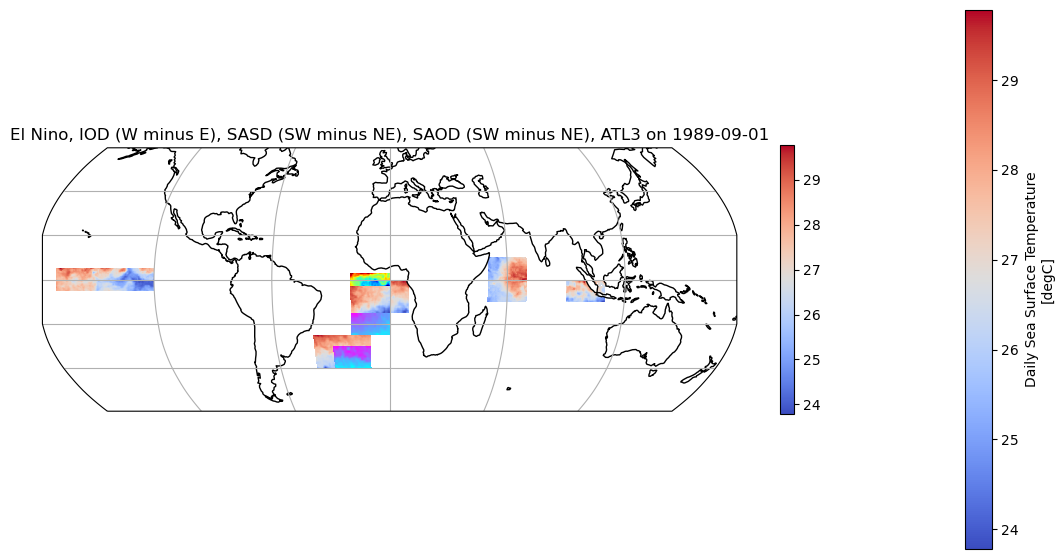

In [12]:
# define the figure size
fig = plt.figure(figsize=(14, 7))

# assign axis and projection
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))

# add coastlines
ax.coastlines()

# add gridlines (lon and lat)
ax.gridlines()

# Set the default keyword arguments
kwargs = {
     "transform": ccrs.PlateCarree(),
     "cmap": "coolwarm"
}

# Plot the Nino34, IOD, SAOD, SASD, ATL3 ocean areas - RECHECK AREAS!!
# SST_Nino34.isel(time=0).plot(ax=ax, add_colorbar=True, **kwargs)

# Plot the Nino34, IOD, SAOD, SASD, ATL3 ocean areas - RECHECK AREAS!!
SST_Nino34.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)

# Add a colorbar manually
cbar = plt.colorbar(SST_Nino34.isel(time=0).plot(ax=ax, **kwargs), shrink=0.5)

SST_IOD_E.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)
SST_IOD_W.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)

SST_SAOD_NEP1.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)
SST_SAOD_NEP2.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)
SST_SAOD_SWP.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)

kwargs = {
     "transform": ccrs.PlateCarree(),
     "cmap": "cool"
}
SST_SASD_SWP.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)
SST_SASD_NEP.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)

kwargs = {
     "transform": ccrs.PlateCarree(),
     "cmap": "jet"
}

SST_ATL3.isel(time=0).plot(ax=ax, add_colorbar=False, **kwargs)

ax.set_title('El Nino, IOD (W minus E), SASD (SW minus NE), SAOD (SW minus NE), ATL3 on 1989-09-01')

# increase map size to show whole earth
ax.set_extent([-180, 180, -90, 90]) # SET values: lon_min,lon_max lat_min, lat_max  

plt.savefig('James_ENSO_IOD_SAOD_SASD_ATL3.1989_09_01.png')

In [13]:
# subset data for IOD (Indian Ocean Dipole; calculated as IOD_West minus IOD_East)
SST_IOD_E = SST.sel(lat=slice(-10,0), lon=slice(90,110))
SST_IOD_E
# note this takes a little while, it stays on 0% for a while then speeds up
from dask.diagnostics import ProgressBar

with ProgressBar():
    SST_IOD_E.load() # converts dask array to xarray dataset and loads into memory

[########################################] | 100% Completed | 405.40 s


In [ ]:
"""Western Tropical Indian Ocean (WTIO) SST index
https://stateoftheocean.osmc.noaa.gov/sur/ind/wtio.php
The WTIO SST anomaly index is an indicator of the surface temperatures 
in a cross-equatorial region spanning the western tropical Indian Ocean. 
It is one half of the Dipole Mode Index, an indicator of the east-west gradient 
in sea surface temperatures in the Indian Ocean. 
It is calculated with SSTs in the box 50°E - 70°E, 10°S - 10°N.

Southeastern Tropical Indian Ocean (SETIO) SST index
https://stateoftheocean.osmc.noaa.gov/sur/ind/setio.php
The SETIO SST anomaly index is an indicator of the surface temperatures 
in the southeastern tropical Indian Ocean, west of the Indonesian island of Sumatra. 
It is one half of the Dipole Mode Index, an indicator of the east-west gradient 
in sea surface temperatures in the Indian Ocean. 
It is calculated with SSTs in the box 90°E - 110°E, 10°S - 0°.

Dipole Mode Index (DMI)
https://stateoftheocean.osmc.noaa.gov/sur/ind/dmi.php
The DMI index is an indicator of the east-west temperature gradient across 
the tropical Indian Ocean, linked to the Indian Ocean Dipole or Zonal Mode. 
It is calculated as the difference of the WTIO and SETIO indices (i.e., WTIO - SETIO) 
Extreme September-October-November rainfall in tropical East Africa 
has associated with periods of persistently high DMI (Black et al.,Mon. Wea. Rev., 2003; 
this paper can be accessed via the AMS Web site here).

South Western Indian Ocean (SWIO) SST index
https://stateoftheocean.osmc.noaa.gov/sur/ind/swio.php
The SWIO SST anomaly index is an indicator of the surface temperatures in a 
region east of South Africa and south of Madagascar. 
It is calculated with SSTs in the box 31°E - 45°E, 32°S - 25°S.
Above average austral summer rainfall over parts of subtropical southern Africa 
has been associated with periods of high SWIO.
This region has been identified as important in research by local scientists 
and others starting in the late 1980s. These include studies by Walker (1989), 
Walker (J. Geophys. Res., 1990), Jury et al. (J. Clim. Appl. Met., 1993), 
Mason and Tyson (J. Geophys. Res., 1992), Mason 1995 (Int. J. Clim., 1995), 
Rocha and Simmonds (Int. J. Clim., 1997), Reason and Mulenga (Int. J. Clim., 1999), 
Reason (J. Clim., 2001), Behera and Yamagata (Geophys. Res. Lett., 2001), 
Reason (Geophys. Res. Lett., 2001), Fauchereau et al. (Int. J. Clim., 2003), 
Hermes and Reason (J. Clim., 2005), 
and Washington and Preston (J. Geophys. Res., 2006).

Niño1+2
https://stateoftheocean.osmc.noaa.gov/sur/pac/nino12.php
The Niño1+2 SST anomaly index is an indicator of far eastern tropical 
Pacific El Niño conditions, off the coasts of Peru and Chile. 
It is calculated with SSTs in the box 90°W - 80°W, 10°S - 0°.

Niño3
https://stateoftheocean.osmc.noaa.gov/sur/pac/nino3.php
The Niño3 SST anomaly index is an indicator of eastern tropical Pacific El Niño conditions. 
It is calculated with SSTs in the box 150°W - 90°W, 5°S - 5°N.

Niño3.4
https://stateoftheocean.osmc.noaa.gov/sur/pac/nino34.php
The Niño3.4 SST anomaly index is an indicator of central tropical Pacific El Niño conditions. 
It is calculated with SSTs in the box 170°W - 120°W, 5°S - 5°N.
    Anomalously warm conditions are associated with El Niño events, 
which peak in boreal fall/winter. NOAA/PMEL hosts an El Niño theme page with 
further information on the tropical Pacific.

Niño4
https://stateoftheocean.osmc.noaa.gov/sur/pac/nino4.php
The Niño4 SST anomaly index is an indicator of western tropical Pacific El Niño conditions. 
It is calculated with SSTs in the box 160°E - 150°W, 5°S - 5°N.
"""


In [ ]:
[########################################] | 100% Completed | 377.62 s

In [14]:
SST_IOD_W = SST.sel(lat=slice(-10,10), lon=slice(50,70))
SST_IOD_W
# note this takes a little while
# from dask.diagnostics import ProgressBar

with ProgressBar():
    SST_IOD_W.load()

[########################################] | 100% Completed | 373.70 s


In [ ]:
[########################################] | 100% Completed | 383.10 s

In [15]:
# group the datasets by month
SST_IOD_W_mon = SST_IOD_W.groupby("time.month")
SST_IOD_E_mon = SST_IOD_E.groupby("time.month")

# find the monthly climatology 
SST_IOD_W_clim = SST_IOD_W_mon.mean(dim="time")
SST_IOD_E_clim = SST_IOD_E_mon.mean(dim="time")

# find the monthly anomaly 
SST_IOD_W_anom = SST_IOD_W_mon - SST_IOD_W_clim
SST_IOD_E_anom = SST_IOD_E_mon - SST_IOD_E_clim  
    
# calculate the weights using the latitude coordinates
weights_IOD_W = np.cos(np.deg2rad(SST_IOD_W_anom.lat))
weights_IOD_E = np.cos(np.deg2rad(SST_IOD_E_anom.lat))

In [16]:
# take the area weighted average of anomalies 
SST_IOD_W_anom_mean = SST_IOD_W_anom.weighted(weights_IOD_W).mean(dim=["lat", "lon"])
SST_IOD_E_anom_mean = SST_IOD_E_anom.weighted(weights_IOD_E).mean(dim=["lat", "lon"])

# Perform subtraction (West - East)
sst_IOD_WestMinusEast_anom_mean = SST_IOD_W_anom_mean - SST_IOD_E_anom_mean

# Calculate 'SAOD index' - smooth using a centered 3 month running mean
IOD_index = sst_IOD_WestMinusEast_anom_mean.rolling(time=3, center=True).mean()

In [17]:
pwd

'/home/jovyan/shared-public/Hesperosaurus_Bon_Fortepiano/data_dir/sst-data'

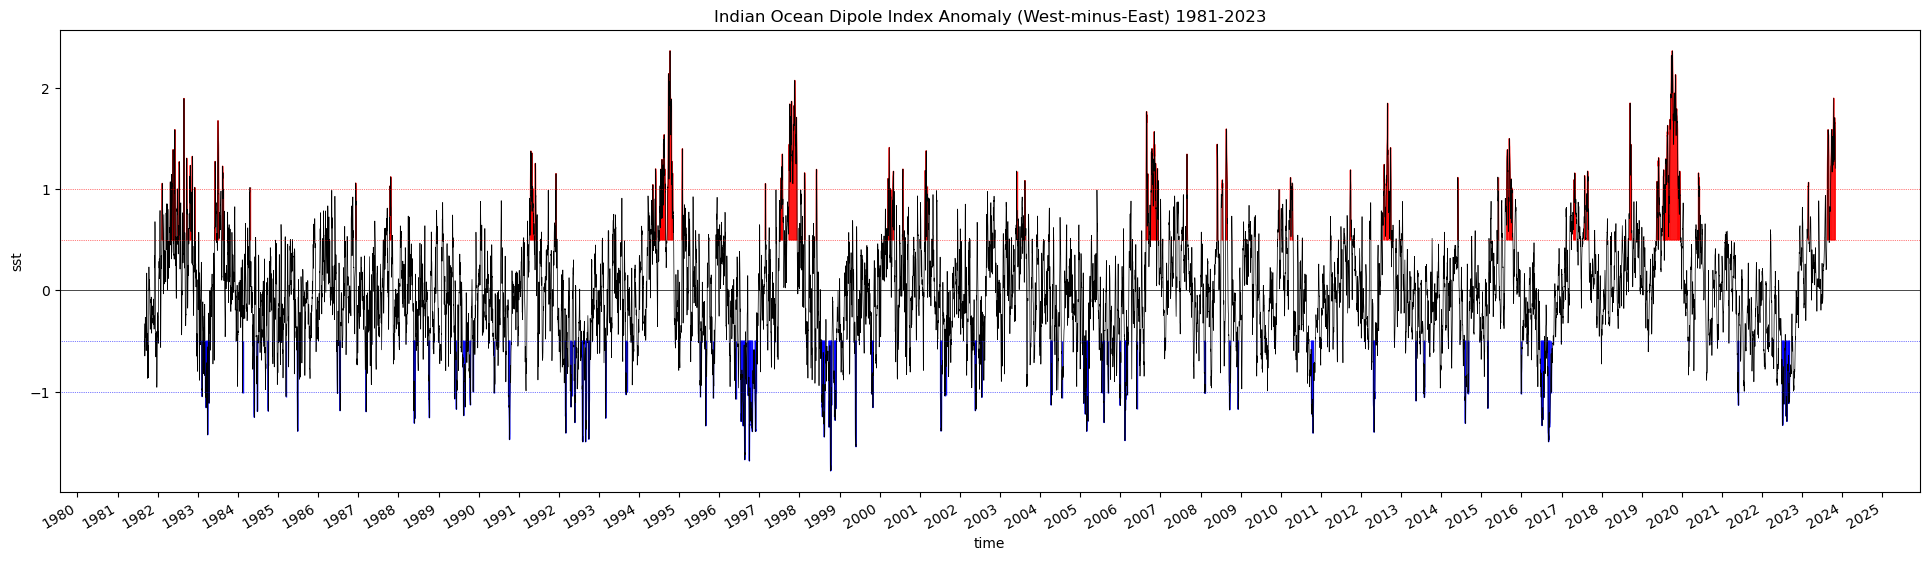

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    sst_IOD_WestMinusEast_anom_mean.time.data, 
    sst_IOD_WestMinusEast_anom_mean.where(sst_IOD_WestMinusEast_anom_mean >= 1.0).data,  # CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    sst_IOD_WestMinusEast_anom_mean.time.data,
    sst_IOD_WestMinusEast_anom_mean.where(sst_IOD_WestMinusEast_anom_mean <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

sst_IOD_WestMinusEast_anom_mean.plot(color="black", linewidth=0.5)  

plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Indian Ocean Dipole Index Anomaly (West-minus-East) 1981-2023")

plt.savefig('James_SST_IOD_anomaly.png')
 

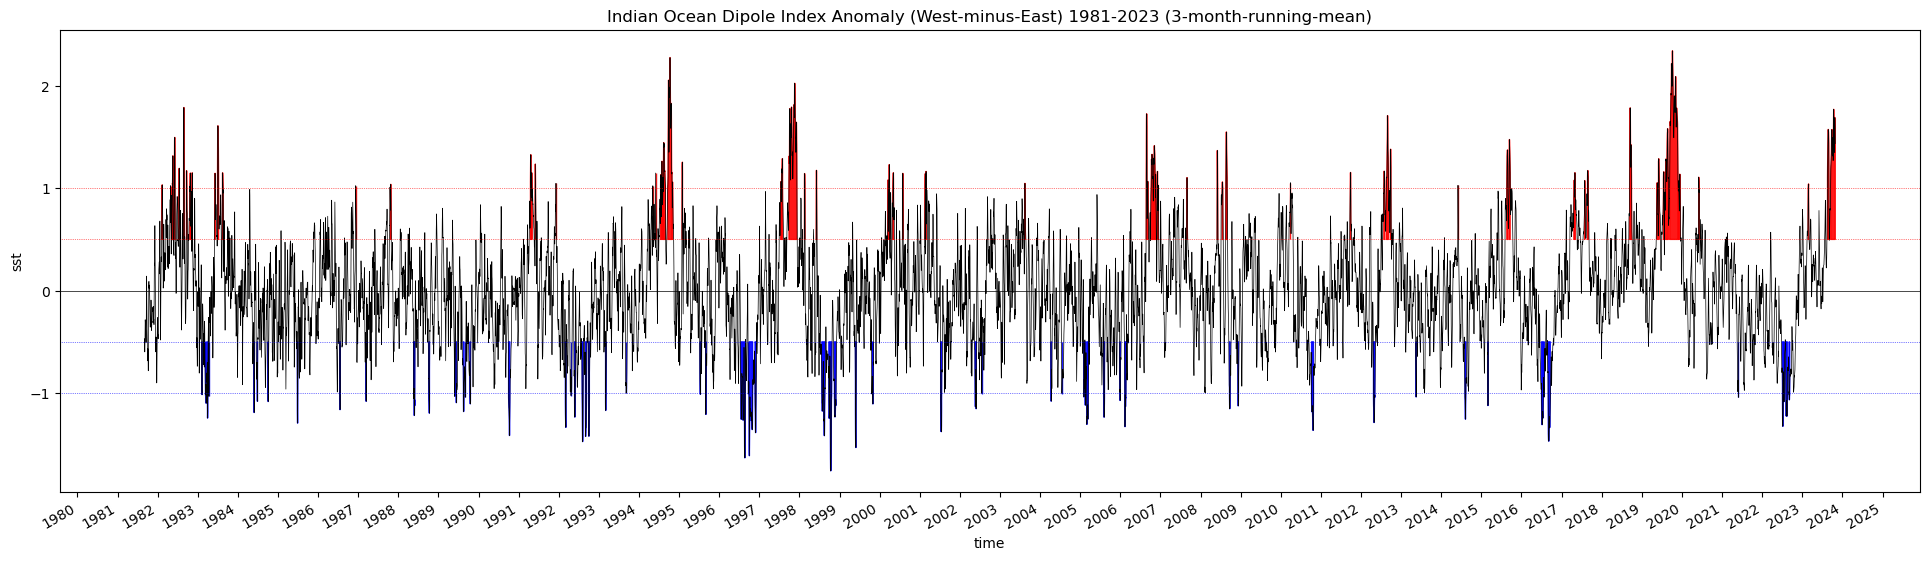

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# fig = plt.figure(figsize=(24, 6))  
fig = plt.figure(figsize=(24, 6))

plt.fill_between(  # plot with color in peaks, troughs
    IOD_index.time.data, 
    IOD_index.where(IOD_index >= 1.0).data,# CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    IOD_index.time.data,
    IOD_index.where(IOD_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)
# plot the smoothed (3-month rolling) data
IOD_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x=1.0 and x= -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Indian Ocean Dipole Index Anomaly (West-minus-East) 1981-2023 (3-month-running-mean)")

plt.savefig('James_SST_IOD_anomaly(3-month-running-mean).png')

In [19]:
# subset data for SAOD (Southern Atlantic Ocean Dipole; 
# calculated as "SAOD_Southwest Pole (SWP)" [lat=(10,-40), lon=(40,-25)]) 
# MINUS 
# SAOD_NorthEast Pole (NEP)  [lat=(10,20), lon=(15,0)]
# Note: different version of SAOD not calculated here:
# SWP = 10-30W, 30-40S (Morioka et al 2011)
#NEP = 0-20W, 15-25S (Morioka et al 2011)

# Northeast Pole 1 & 2 (calculate separately because crosses 0 deg lon)
SST_SAOD_NEP1 = SST.sel(lat=slice(-15, 0), lon=slice(0, 10))             
SST_SAOD_NEP2 = SST.sel(lat=slice(-15, 0), lon=slice(340, 360))
# concatenate Northeast portions
# SST_SAOD_NEP = xr.concat([SST_SAOD_NEP2, SST_SAOD_NEP1], dim='lon')  
# SST_SAOD_NEP

In [20]:
SST_SAOD_SWP = SST.sel(lat=slice(-40,-25), lon=slice(320, 350)) 
SST_SAOD_SWP

<xarray.DataArray 'sst' (time: 15399, lat: 60, lon: 120)>
dask.array<getitem, shape=(15399, 60, 120), dtype=float32, chunksize=(15399, 60, 120), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
  * lat      (lat) float32 -39.88 -39.62 -39.38 -39.12 ... -25.62 -25.38 -25.12
  * lon      (lon) float32 320.1 320.4 320.6 320.9 ... 349.1 349.4 349.6 349.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.82]

In [21]:
# group the datasets by month
SST_SAOD_NEP1_mon = SST_SAOD_NEP1.groupby("time.month")
SST_SAOD_NEP2_mon = SST_SAOD_NEP2.groupby("time.month")
SST_SAOD_SWP_mon = SST_SAOD_SWP.groupby("time.month")

# find the monthly climatology in the Nino 3.4 region
SST_SAOD_NEP1_clim = SST_SAOD_NEP1_mon.mean(dim="time")
SST_SAOD_NEP2_clim = SST_SAOD_NEP2_mon.mean(dim="time")
SST_SAOD_SWP_clim = SST_SAOD_SWP_mon.mean(dim="time")

# find the monthly anomaly in the SAOD region
SST_SAOD_NEP1_anom = SST_SAOD_NEP1_mon - SST_SAOD_NEP1_clim
SST_SAOD_NEP2_anom = SST_SAOD_NEP2_mon - SST_SAOD_NEP2_clim
SST_SAOD_SWP_anom = SST_SAOD_SWP_mon - SST_SAOD_SWP_clim

# convert Dask to xarray dataset and load into memory; will sit at 0% for a while, then speed up
from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_SAOD_NEP1_anom.load() 
    SST_SAOD_NEP2_anom.load()
    SST_SAOD_SWP_anom.load()
    
# calculate the weights using the latitude coordinates
weights_SAOD_NEP1 = np.cos(np.deg2rad(SST_SAOD_NEP1_anom.lat))
weights_SAOD_NEP2 = np.cos(np.deg2rad(SST_SAOD_NEP2_anom.lat))
weights_SAOD_SWP = np.cos(np.deg2rad(SST_SAOD_SWP_anom.lat))


[########################################] | 100% Completed | 288.17 s
[########################################] | 100% Completed | 291.80 s
[########################################] | 100% Completed | 280.42 s


In [ ]:
[########################################] | 100% Completed | 297.95 s
[########################################] | 100% Completed | 298.36 s
[########################################] | 100% Completed | 298.10 s

In [22]:
# take the area weighted average of anomalies 
SST_SAOD_NEP1_anom_mean = SST_SAOD_NEP1_anom.weighted(weights_SAOD_NEP1).mean(dim=["lat", "lon"])
SST_SAOD_NEP2_anom_mean = SST_SAOD_NEP2_anom.weighted(weights_SAOD_NEP2).mean(dim=["lat", "lon"])
SST_SAOD_SWP_anom_mean = SST_SAOD_SWP_anom.weighted(weights_SAOD_SWP).mean(dim=["lat", "lon"])        

In [23]:
# Perform subtraction (SWP - NEP)
"""Wainer et al 2014: South Atlantic Subtropical Dipole (SASD)
It is possible to formulate an index for the SASD 
by subtracting the area-average SST of the Northeastern Pole from the Southwest Pole. 
This index can then be associated to precipitation variability over the continent."""

SST_SAOD_SWP_Minus_NEP_anom_mean = SST_SAOD_SWP_anom_mean - (SST_SAOD_NEP1_anom_mean + SST_SAOD_NEP2_anom_mean)/2 

# Calculate 'SAOD index' - smooth using a centered 3 month running mean
SAOD_index = SST_SAOD_SWP_Minus_NEP_anom_mean.rolling(time=3, center=True).mean()

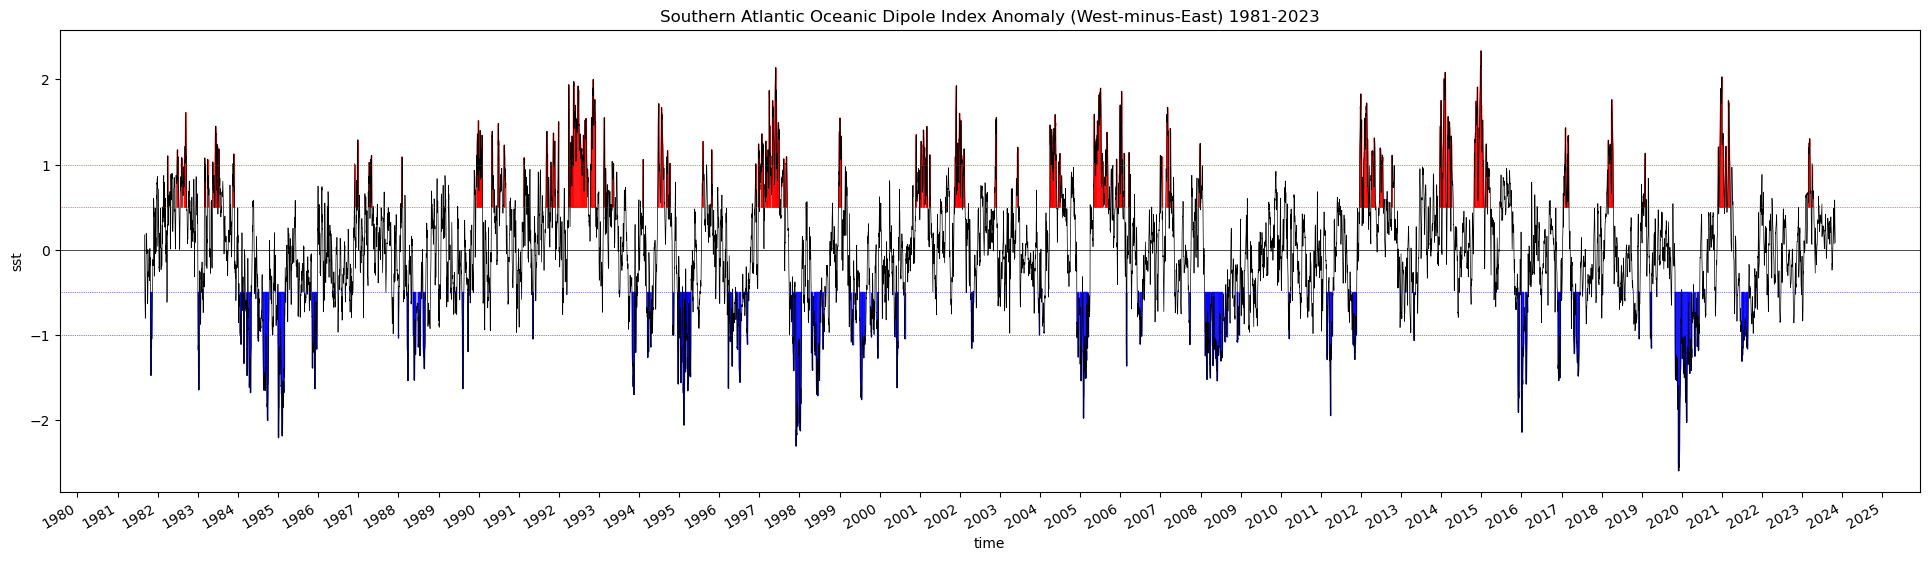

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    SST_SAOD_SWP_Minus_NEP_anom_mean.time.data, 
    SST_SAOD_SWP_Minus_NEP_anom_mean.where(SST_SAOD_SWP_Minus_NEP_anom_mean >= 1.0).data,  # CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    SST_SAOD_SWP_Minus_NEP_anom_mean.time.data,
    SST_SAOD_SWP_Minus_NEP_anom_mean.where(SST_SAOD_SWP_Minus_NEP_anom_mean <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)
# plot the smoothed (3-month rolling) data
SST_SAOD_SWP_Minus_NEP_anom_mean.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x=1.0 and x= -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Southern Atlantic Oceanic Dipole Index Anomaly (West-minus-East) 1981-2023")

plt.savefig('James_SST_SAOD_anomaly(West_minus_East).1981-2023.png')

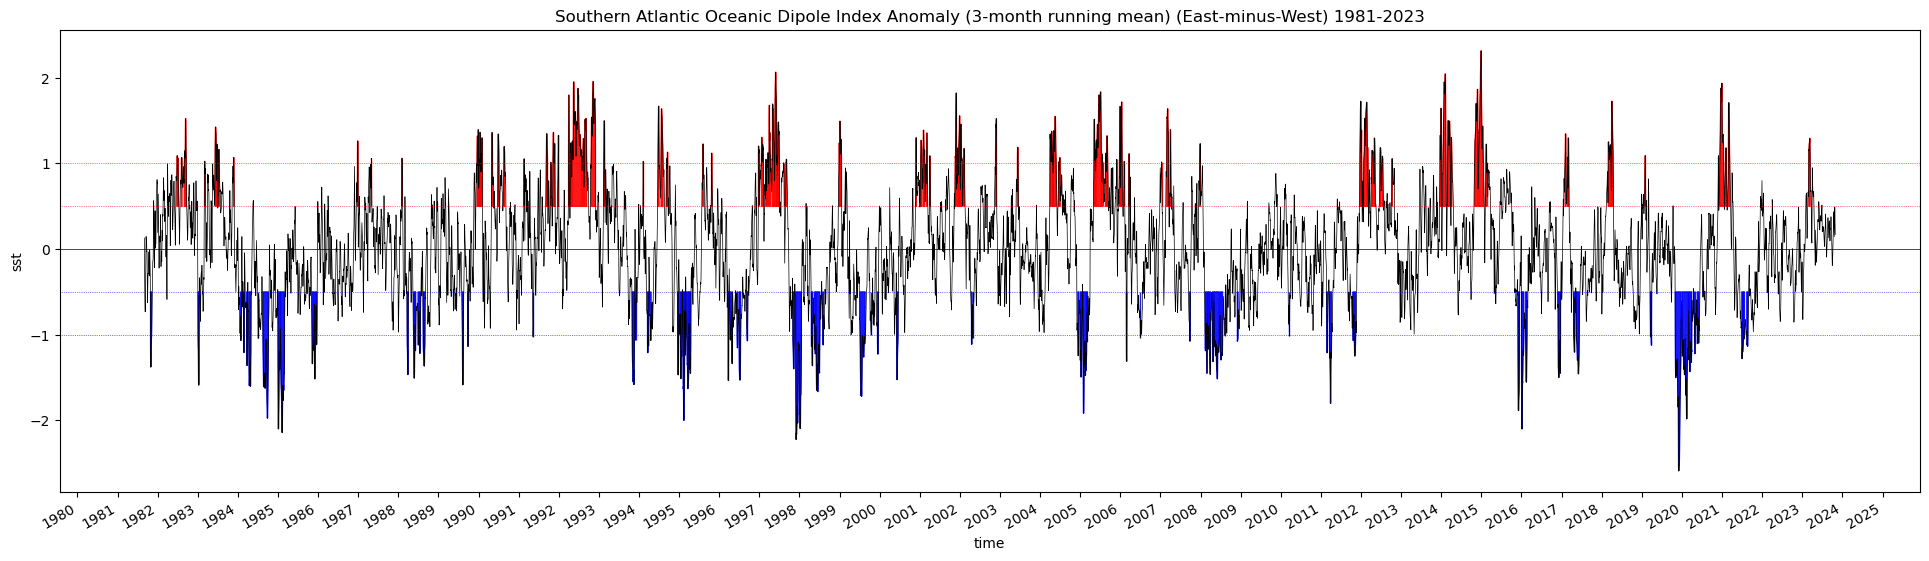

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
  
fig = plt.figure(figsize=(24, 6))

plt.fill_between(  # plot with color in peaks, troughs
    SAOD_index.time.data, 
    SAOD_index.where(SAOD_index >= 1.0).data,  # CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    SAOD_index.time.data,
    SAOD_index.where(SAOD_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)
# plot the smoothed (3-month rolling) data
SAOD_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x=1.0 and x= -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted")

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Southern Atlantic Oceanic Dipole Index Anomaly (3-month running mean) (East-minus-West) 1981-2023")

plt.savefig('James_SST_SAOD_Index_anomaly.(West_minus_East)_3-month_running_mean.png')

In [25]:
"""Wainer I et al (2014) Reconstruction of the South Atlantic Subtropical Dipole 
index for the past 12,000 years from surface temperature proxy, Scientific Reports, srep05291

the South Atlantic Subtropical Dipole index (SASD):
we calculated the SASD index by 
sub-tracting the area-averaged SST at 
SASD_SWP: 30deg–10degW; 30deg–40degS 
from the area-averaged SST at 
SASD_NEP: 20degW–0deg; 15deg–25degS 
(SASDAVG). """

# subset data for IOD (Indian Ocean Dipole; calculated as IOD_West minus IOD_East)
SST_SASD_SWP = SST.sel(lat=slice(-40,-30), lon=slice(330,350))
SST_SASD_SWP
# note this takes a little while, it stays on 0% for a while then speeds up
from dask.diagnostics import ProgressBar

with ProgressBar():
    SST_SASD_SWP.load() # converts dask array to xarray dataset and loads into memory

[########################################] | 100% Completed | 273.76 s


In [ ]:
#[########################################] | 100% Completed | 292.78 s

In [26]:
SST_SASD_NEP = SST.sel(lat=slice(-25,-15), lon=slice(340,360))
SST_SASD_NEP
# note this takes a little while, it stays on 0% for a while then speeds up
from dask.diagnostics import ProgressBar

with ProgressBar():
    SST_SASD_NEP.load() # converts dask array to xarray dataset and loads into memory

[########################################] | 100% Completed | 311.12 s


In [ ]:
# [########################################] | 100% Completed | 311.12 s

In [27]:
# group the datasets by month
SST_SASD_SWP_mon = SST_SASD_SWP.groupby("time.month")
SST_SASD_NEP_mon = SST_SASD_NEP.groupby("time.month")

# find the monthly climatology 
SST_SASD_SWP_clim = SST_SASD_SWP_mon.mean(dim="time")
SST_SASD_NEP_clim = SST_SASD_NEP_mon.mean(dim="time")

# find the monthly anomaly 
SST_SASD_SWP_anom = SST_SASD_SWP_mon - SST_SASD_SWP_clim
SST_SASD_NEP_anom = SST_SASD_NEP_mon - SST_SASD_NEP_clim  
    
# calculate the weights using the latitude coordinates
weights_SASD_SWP = np.cos(np.deg2rad(SST_SASD_SWP_anom.lat))
weights_SASD_NEP = np.cos(np.deg2rad(SST_SASD_NEP_anom.lat))

In [28]:
# take the area weighted average of anomalies 
SST_SASD_SWP_anom_mean = SST_SASD_SWP_anom.weighted(weights_SASD_SWP).mean(dim=["lat", "lon"])
SST_SASD_NEP_anom_mean = SST_SASD_NEP_anom.weighted(weights_SASD_NEP).mean(dim=["lat", "lon"])

# Perform subtraction (West - East)
sst_SASD_SWPMinusNEP_anom_mean = SST_SASD_SWP_anom_mean - SST_SASD_NEP_anom_mean

# Calculate 'SAOD index' - smooth using a centered 3 month running mean
SASD_index = sst_SASD_SWPMinusNEP_anom_mean.rolling(time=3, center=True).mean()
SASD_index

<xarray.DataArray 'sst' (time: 15399)>
array([       nan, 0.24455373, 0.07552588, ..., 0.6017269 , 0.6303924 ,
              nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-09-02 ... 2023-10-29
    month    (time) int64 9 9 9 9 9 9 9 9 9 9 ... 10 10 10 10 10 10 10 10 10 10

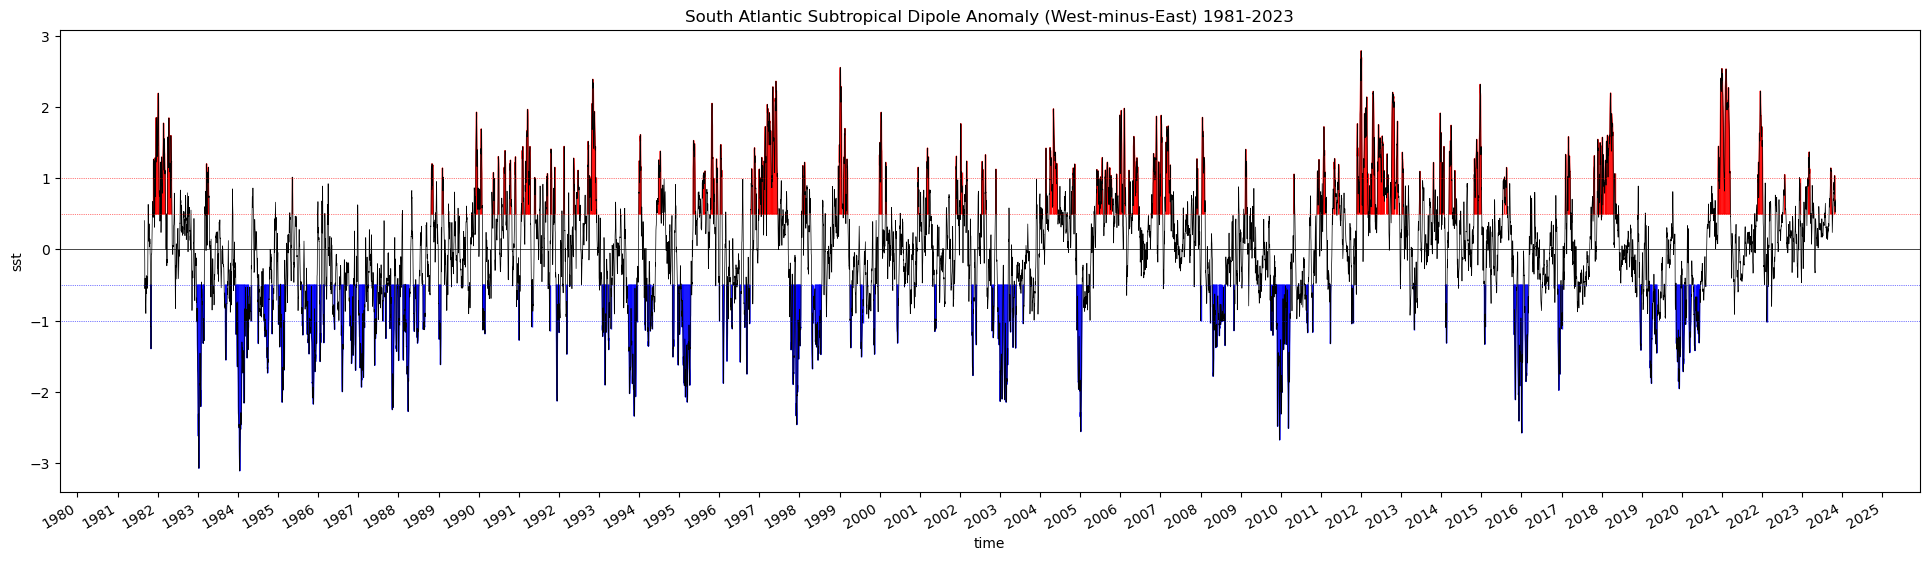

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    sst_SASD_SWPMinusNEP_anom_mean.time.data, 
    sst_SASD_SWPMinusNEP_anom_mean.where(sst_SASD_SWPMinusNEP_anom_mean >= 1.0).data,  # CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    sst_SASD_SWPMinusNEP_anom_mean.time.data,
    sst_SASD_SWPMinusNEP_anom_mean.where(sst_SASD_SWPMinusNEP_anom_mean <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)
# plot the smoothed (3-month rolling) data
sst_SASD_SWPMinusNEP_anom_mean.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x=1.0 and x= -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("South Atlantic Subtropical Dipole Anomaly (West-minus-East) 1981-2023")

plt.savefig('James_SST_SASD_anomaly(SWP_minus_NEP).1981-2023.png')

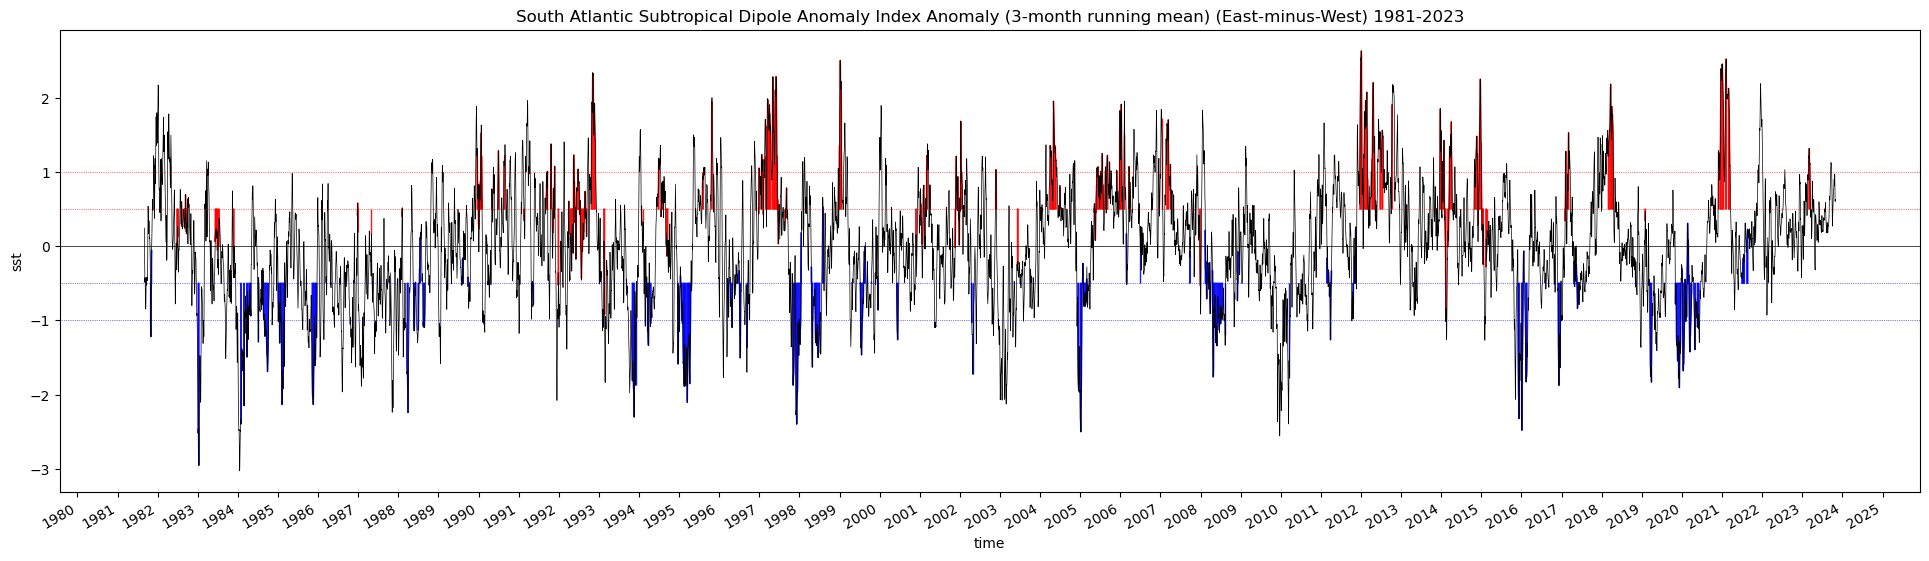

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24, 6))

plt.fill_between(  # plot with color in peaks, troughs
    SASD_index.time.data, 
    SASD_index.where(SAOD_index >= 1.0).data,  # CHECK CHANGE top boundary: 1.0 ; bottom boundary -1.0    
    0.5,
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    SASD_index.time.data,
    SASD_index.where(SAOD_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)
# plot the smoothed (3-month rolling) data
SASD_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x=1.0 and x= -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted")

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("South Atlantic Subtropical Dipole Anomaly Index Anomaly (3-month running mean) (East-minus-West) 1981-2023")

plt.savefig('James_SST_SASD_Index_anomaly.(SWP_minus_NEP)_3-month_running_mean.png')

### El Niño 3.4

In [32]:
# subset data for Nino34  # NB. longitude values are in degrees east
SST_Nino34 = SST.sel(lat=slice(-5, 5), lon=slice(190, 240)) 

# group the dataset by month
SST_Nino34_mon = SST_Nino34.groupby("time.month")

# find the monthly climatology in the Nino 3.4 region
SST_Nino34_clim = SST_Nino34_mon.mean(dim="time")

# find the monthly anomaly in the Nino 3.4 region
SST_Nino34_anom = SST_Nino34_mon - SST_Nino34_clim

# convert Dask to xarray dataset and load into memory; will sit at 0% for a while, then speed up
from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_Nino34_anom.load() # converts dask array to xarray dataset and loads into memory
    
# calculate the weights using the latitude coordinates
weights_Nino34 = np.cos(np.deg2rad(SST_Nino34_anom.lat))
# weights_Nino34.name = "weights"

# # take the area weighted average of anomalies in the Nino 3.4 region
SST_Nino34_anom_mean = SST_Nino34_anom.weighted(weights_Nino34).mean(dim=["lat", "lon"])

# Calculate 'El Niño index' - smooth using a centered 3 month running mean
oni_index = SST_Nino34_anom_mean.rolling(time=3, center=True).mean()


[########################################] | 100% Completed | 316.45 s


In [33]:
#[########################################] | 100% Completed | 384.04 s

In [ ]:
oni_index.to_netcdf('oni_index.nc')

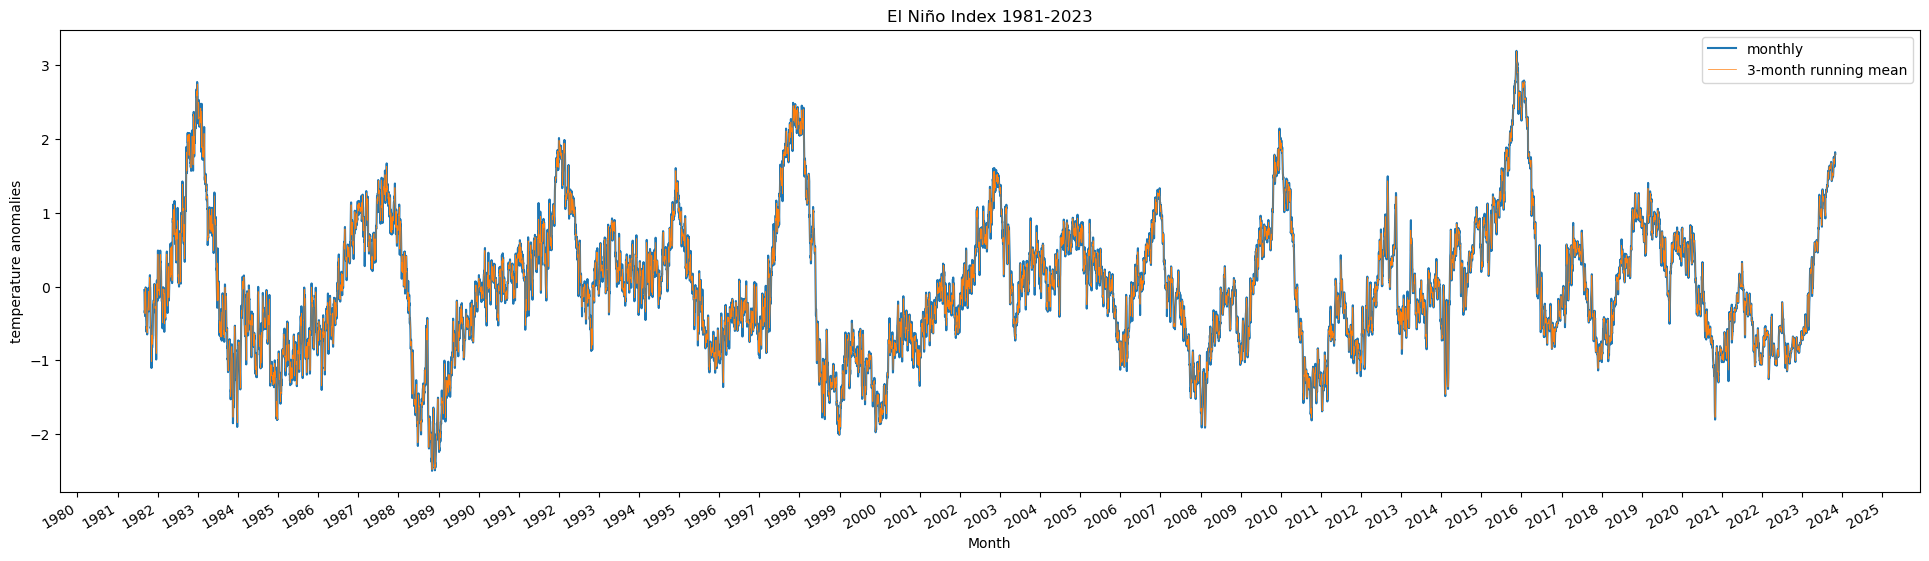

In [38]:
import matplotlib.dates as mdates

# define the plot size  
fig = plt.figure(figsize=(24,6))

# assign axis
ax = plt.axes()

# plot the monhtly data on the assigned axis
SST_Nino34_anom_mean.plot(ax=ax)

# plot the smoothed data on the assigned axis
oni_index.plot(ax=ax, linewidth=0.5)

# add legend
ax.legend(["monthly", "3-month running mean"])

# add ylabel
ax.set_ylabel("temperature anomalies")

# add xlabel
ax.set_xlabel("Month")

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# add title
plt.title("El Niño Index 1981-2023")

# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('James_SST_ElNiño_climatology.png')

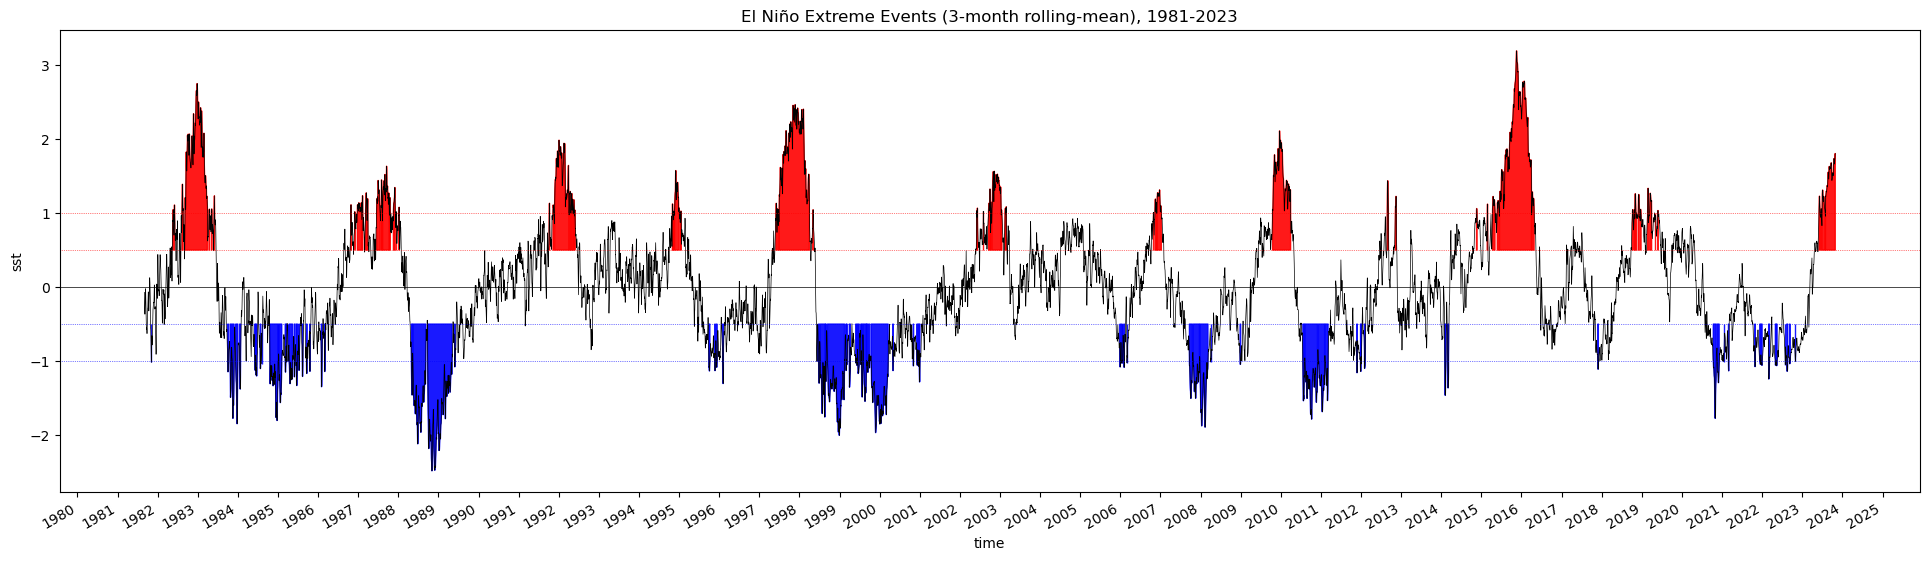

In [11]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    oni_index.time.data, 
    oni_index.where(oni_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    oni_index.time.data,
    oni_index.where(oni_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the monthly data on the assigned axis
# SST_Nino34_anom_mean.plot(ax=ax)

# plot the smoothed (3-month rolling) data
oni_index.plot(color="black", linewidth=0.5)  


# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("El Niño Extreme Events (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_SST_Nino34_ExtremeEvents_1981-2023).png')

PLOT OTHER ATLANTIC INDICES

"""The ATL3 index is the area-averaged SST anomaly over 20°W−0 and 3°S−3°N, 
commonly used to describe the Tropical Atlantic interannual variability, 
as it covers the area with the largest interannual variance,
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7954793
The ATL3 index is the,the largest interannual variance"""

In [13]:
"""The ATL3 index is the area-averaged SST anomaly over 20°W−0 and 3°S−3°N, 
commonly used to describe the Tropical Atlantic interannual variability, 
as it covers the area with the largest interannual variance,
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7954793
The ATL3 index is the largest interannual variance"""
# subset data for ATL3  # NB. longitude values are in degrees east
SST_ATL3 = SST.sel(lat=slice(-3, 3), lon=slice(340, 360)) 

# group the dataset by month
SST_ATL3_mon = SST_ATL3.groupby("time.month")

# find the monthly climatology in the ATL3 region
SST_ATL3_clim = SST_ATL3_mon.mean(dim="time")

# find the monthly anomaly in the ATL3 region
SST_ATL3_anom = SST_ATL3_mon - SST_ATL3_clim

# convert Dask to xarray dataset and load into memory; will sit at 0% for a while, then speed up
from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_ATL3_anom.load() # converts dask array to xarray dataset and loads into memory
    
# calculate the weights using the latitude coordinates
weights_ATL3 = np.cos(np.deg2rad(SST_ATL3_anom.lat))
# weights_Nino34.name = "weights"

# # take the area weighted average of anomalies in the ATL3 region
SST_ATL3_anom_mean = SST_ATL3_anom.weighted(weights_ATL3).mean(dim=["lat", "lon"])

# Calculate 'El Niño index' - smooth using a centered 3 month running mean
ATL3_index = SST_ATL3_anom_mean.rolling(time=3, center=True).mean()


[########################################] | 100% Completed | 277.58 s


In [ ]:
# [########################################] | 100% Completed | 374.92 s

In [14]:
ATL3_index.to_netcdf('ATL3_index.nc')

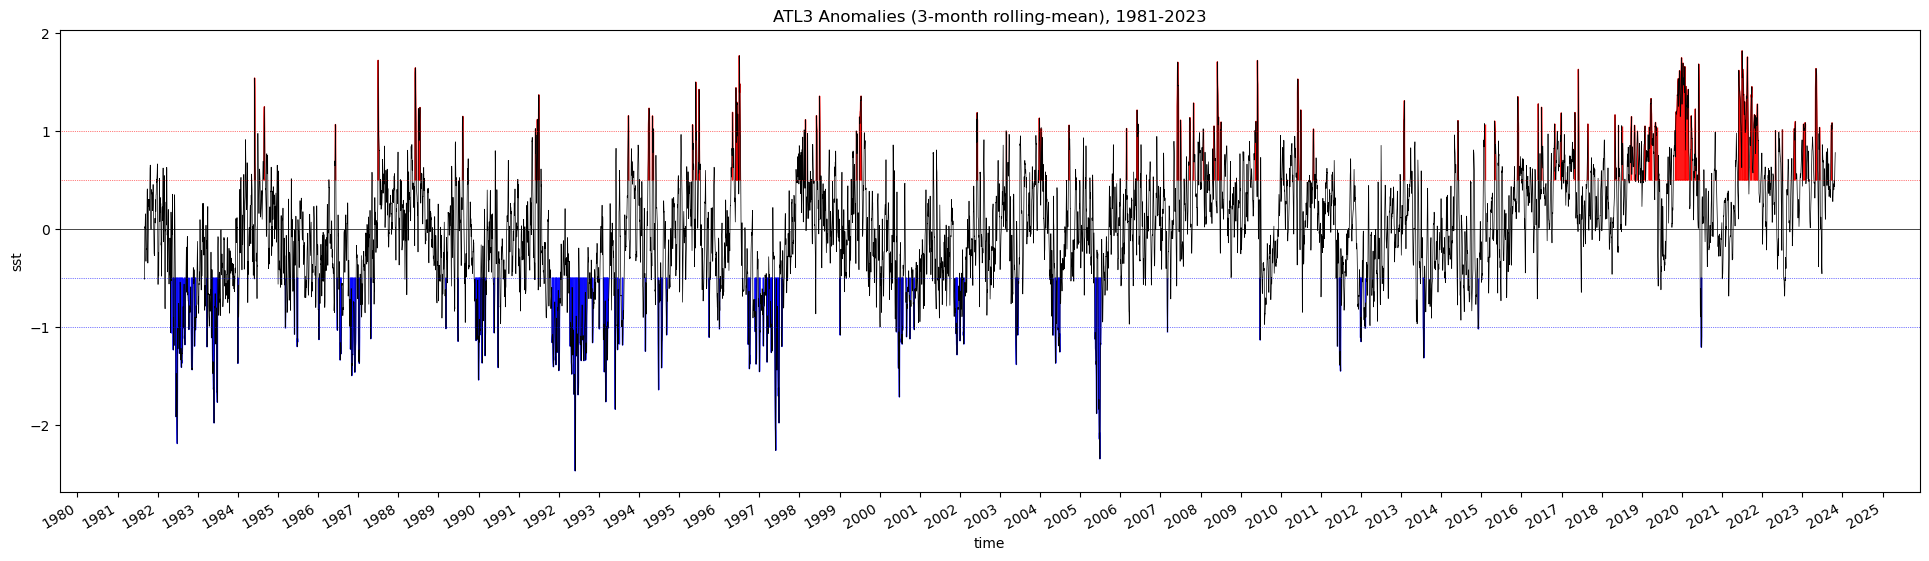

In [18]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    ATL3_index.time.data, 
    ATL3_index.where(ATL3_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    ATL3_index.time.data,
    ATL3_index.where(ATL3_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
ATL3_index.plot(color="black", linewidth=0.5)  


# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("ATL3 Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_SST_ATL3_Index_1981-2023).png')

Tropical North Atlantic Index, and Tropical South Atlantic Index """ Location of tropical Atlantic Ocean regions
(https://www.metoffice.gov.uk/research/climate/seasonal-to-decadal/gpc-outlooks/atlantic-indian-ocean)
Tropical North Atlantic (TNA) lies between 55°W and 15°W, 5°N to 25°N, and 
Tropical South Atlantic (TSA) lies between 30°W to 10°E, 20°S to the equator. 
The north-south difference TNA minus TSA 
across the equator is a measure of the tropical Atlantic sea surface temperature dipole

https://stateoftheocean.osmc.noaa.gov/sur/atl/tna.php
Tropical Northern Atlantic Index (TNA)
The TNA SST anomaly index is an indicator of the surface temperatures in the 
eastern tropical North Atlantic Ocean. 
It is calculated with SSTs in the box 55°W - 15°W, 5°N - 25°

In [16]:
""" Location of tropical Atlantic Ocean regions
(https://www.metoffice.gov.uk/research/climate/seasonal-to-decadal/gpc-outlooks/atlantic-indian-ocean)
Tropical North Atlantic (TNA) lies between 55°W and 15°W, 5°N to 25°N, and 
Tropical South Atlantic (TSA) lies between 30°W to 10°E, 20°S to the equator. 

The north-south difference TNA minus TSA 
across the equator is a measure of the tropical Atlantic sea surface temperature dipole

https://stateoftheocean.osmc.noaa.gov/sur/atl/tna.php
Tropical Northern Atlantic Index (TNA)
The TNA SST anomaly index is an indicator of the surface temperatures in the 
eastern tropical North Atlantic Ocean. 
It is calculated with SSTs in the box 55°W - 15°W, 5°N - 25°N.
"""

# subset data for TNA & TSA # NB. longitude values are in degrees east
SST_TNA = SST.sel(lat=slice(5, 25), lon=slice(305, 345)) 

# group the dataset by month
SST_TNA_mon = SST_TNA.groupby("time.month")

# find the monthly climatology in the ATL3 region
SST_TNA_clim = SST_TNA_mon.mean(dim="time")

# find the monthly anomaly in the ATL3 region
SST_TNA_anom = SST_TNA_mon - SST_TNA_clim

# convert Dask to xarray dataset and load into memory; will sit at 0% for a while, then speed up
from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_TNA_anom.load() # converts dask array to xarray dataset and loads into memory
    
# calculate the weights using the latitude coordinates
weights_TNA = np.cos(np.deg2rad(SST_TNA_anom.lat))
# weights_Nino34.name = "weights"

# # take the area weighted average of anomalies in the ATL3 region
SST_TNA_anom_mean = SST_TNA_anom.weighted(weights_TNA).mean(dim=["lat", "lon"])

# Calculate 'El Niño index' - smooth using a centered 3 month running mean
TNA_index = SST_TNA_anom_mean.rolling(time=3, center=True).mean()

[########################################] | 100% Completed | 329.89 s


In [ ]:
# [########################################] | 100% Completed | 376.18 s

In [9]:
TNA_index.to_netcdf('TNA_index.nc')

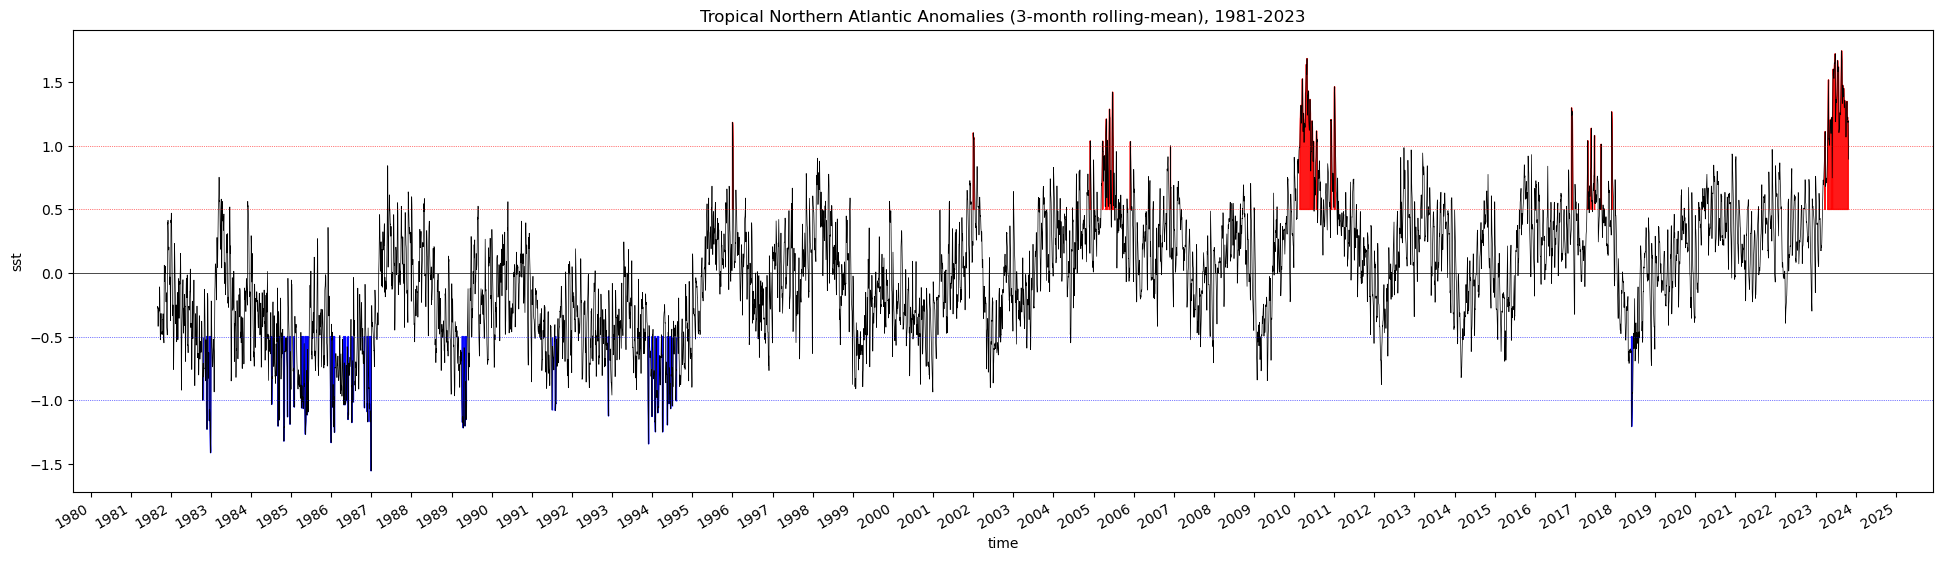

In [19]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    TNA_index.time.data, 
    TNA_index.where(TNA_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    TNA_index.time.data,
    TNA_index.where(TNA_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
TNA_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("Tropical Northern Atlantic Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_SST_TNA_Index_1981-2023).png')

In [20]:
"""https://stateoftheocean.osmc.noaa.gov/sur/atl/tsa.php
Tropical Southern Atlantic Index (TSA)
The TSA SST anomaly index is an indicator of the surface temperatures in the 
Gulf of Guinea, the eastern tropical South Atlantic Ocean. 
It is calculated with SSTs in the box 30°W - 10°E, 20°S - 0°.
"""
# subset data for TSA  # NB. longitude values are in degrees east
SST_TSA1 = SST.sel(lat=slice(-20, 0), lon=slice(330, 360)) 
SST_TSA2 = SST.sel(lat=slice(-20, 0), lon=slice(0, 10))

# group the datasets by month
SST_TSA1_mon = SST_TSA1.groupby("time.month")
SST_TSA2_mon = SST_TSA2.groupby("time.month")

# find the monthly climatology in the Nino 3.4 region
SST_TSA1_clim = SST_TSA1_mon.mean(dim="time")
SST_TSA2_clim = SST_TSA2_mon.mean(dim="time")

# find the monthly anomaly in the SAOD region
SST_TSA1_anom = SST_TSA1_mon - SST_TSA1_clim
SST_TSA2_anom = SST_TSA2_mon - SST_TSA2_clim

# convert Dask to xarray dataset and load into memory; 
# will sit at 0% for a while, then speed up
# from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_TSA1_anom.load() 
    SST_TSA2_anom.load()
    
# calculate the weights using the latitude coordinates
weights_TSA1 = np.cos(np.deg2rad(SST_TSA1_anom.lat))
weights_TSA2 = np.cos(np.deg2rad(SST_TSA2_anom.lat))

# take the area weighted average of anomalies 
SST_TSA1_anom_mean = SST_TSA1_anom.weighted(weights_TSA1).mean(dim=["lat", "lon"])
SST_TSA2_anom_mean = SST_TSA2_anom.weighted(weights_TSA2).mean(dim=["lat", "lon"])

# add together two parts of TSA
SST_TSA_anom_mean = SST_TSA1_anom_mean + SST_TSA2_anom_mean

# Calculate 'SAOD index' - smooth using a centered 3 month running mean
TSA_index = SST_TSA_anom_mean.rolling(time=3, center=True).mean()

[########################################] | 100% Completed | 321.01 s
[########################################] | 100% Completed | 314.94 s


In [ ]:
#[########################################] | 100% Completed | 313.48 s
#[########################################] | 100% Completed | 315.02 s

In [21]:
TSA_index.to_netcdf('TSA_index.nc')

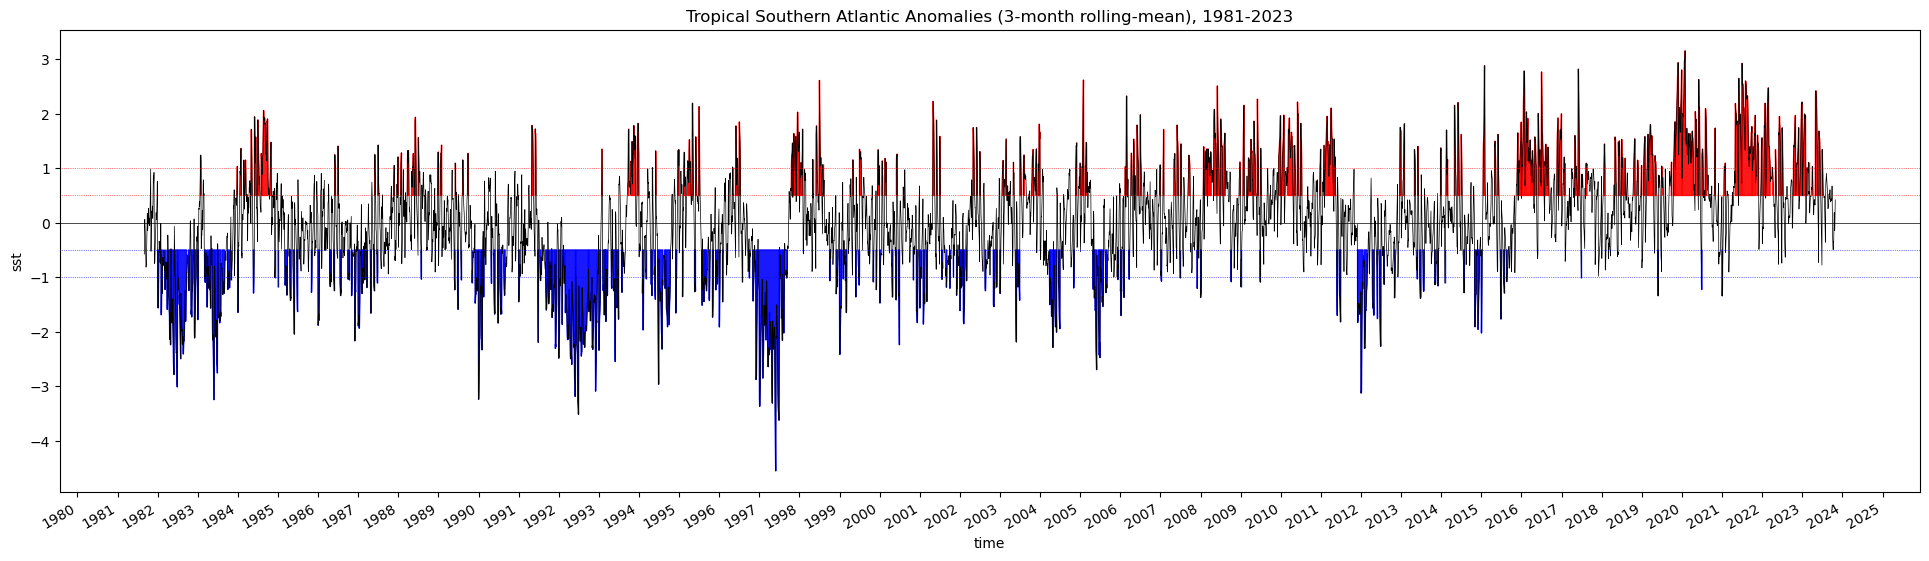

In [22]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    TSA_index.time.data, 
    TSA_index.where(TSA_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    TSA_index.time.data,
    TSA_index.where(TSA_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
TSA_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("Tropical Southern Atlantic Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_SST_TSA_Index_1981-2023).png')

In [24]:
""" Location of tropical Atlantic Ocean regions
(https://www.metoffice.gov.uk/research/climate/seasonal-to-decadal/gpc-outlooks/atlantic-indian-ocean)
Tropical North Atlantic (TNA) lies between 55°W and 15°W, 5°N to 25°N, and 
Tropical South Atlantic (TSA) lies between 30°W to 10°E, 20°S to the equator. 

The north-south difference TNA minus TSA 
across the equator is a measure of the tropical Atlantic sea surface temperature dipole"""
# Perform subtraction (North -South)
sst_TNAMinus_TSA_anom_mean = SST_TNA_anom_mean - SST_TSA_anom_mean

# Calculate 'TA_SST_Dipole' - smooth using a centered 3 month running mean
TA_SST_Dipole = sst_TNAMinus_TSA_anom_mean.rolling(time=3, center=True).mean()
TA_SST_Dipole
TA_SST_Dipole.to_netcdf('TA_SST_Dipole.nc')

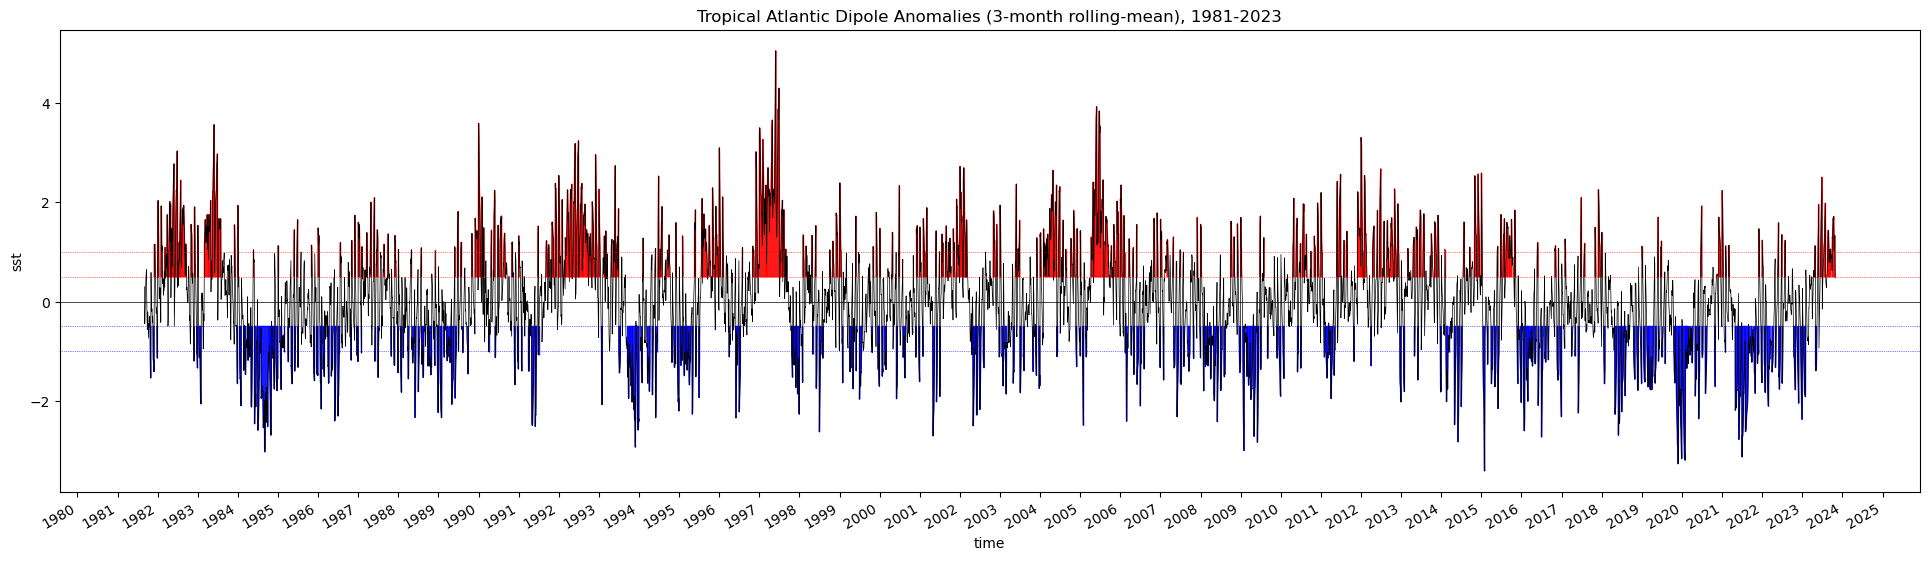

In [25]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    TA_SST_Dipole.time.data, 
    TA_SST_Dipole.where(TA_SST_Dipole >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    TA_SST_Dipole.time.data,
    TA_SST_Dipole.where(TA_SST_Dipole <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)
# plot the smoothed (3-month rolling) data
TA_SST_Dipole.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("Tropical Atlantic Dipole Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_TA_SST_Dipole_1981-2023).png')

In [ ]:
"""Tropical Atlantic (TASI) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/tasi.php
The TASI SST anomaly index is an indicator of the meridional surface 
temperature gradient in the tropical Atlantic Ocean. 
It is calculated as the difference of the NAT and SAT indices (NAT-SAT)

North Atlantic Tropical (NAT) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/nat.php
The NAT SST anomaly index is an indicator of the surface temperatures in a 
broad swath of the tropical North Atlantic Ocean. 
It is calculated with SSTs in the box 40°W - 20°W, 5°N - 20°N.

South Atlantic Tropical (SAT) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/sat.php
The SAT SST anomaly index is an indicator of the surface temperatures in a 
broad swath of the tropical South Atlantic Ocean. 
It is calculated with SSTs in the box 15°W - 5°E, 20°S - 5°S.
"""

In [12]:
"""North Atlantic Tropical (NAT) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/nat.php
The NAT SST anomaly index is an indicator of the surface temperatures in a 
broad swath of the tropical North Atlantic Ocean. 
It is calculated with SSTs in the box 40°W - 20°W, 5°N - 20°N."""
# subset data for TNA & TSA # NB. longitude values are in degrees east
SST_NAT = SST.sel(lat=slice(5, 20), lon=slice(320, 340)) 

# group the dataset by month
SST_NAT_mon = SST_NAT.groupby("time.month")

# find the monthly climatology in the ATL3 region
SST_NAT_clim = SST_NAT_mon.mean(dim="time")

# find the monthly anomaly in the ATL3 region
SST_NAT_anom = SST_NAT_mon - SST_NAT_clim

# convert Dask to xarray dataset and load into memory; will sit at 0% for a while, then speed up
from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_NAT_anom.load() # converts dask array to xarray dataset and loads into memory
    
# calculate the weights using the latitude coordinates
weights_NAT = np.cos(np.deg2rad(SST_NAT_anom.lat))
# weights_Nino34.name = "weights"

# # take the area weighted average of anomalies in the ATL3 region
SST_NAT_anom_mean = SST_NAT_anom.weighted(weights_NAT).mean(dim=["lat", "lon"])

# Calculate 'El Niño index' - smooth using a centered 3 month running mean
NAT_index = SST_NAT_anom_mean.rolling(time=3, center=True).mean()

[########################################] | 100% Completed | 303.53 s


In [ ]:
# [########################################] | 100% Completed | 303.53 s

In [13]:
NAT_index.to_netcdf('NAT_index.nc')

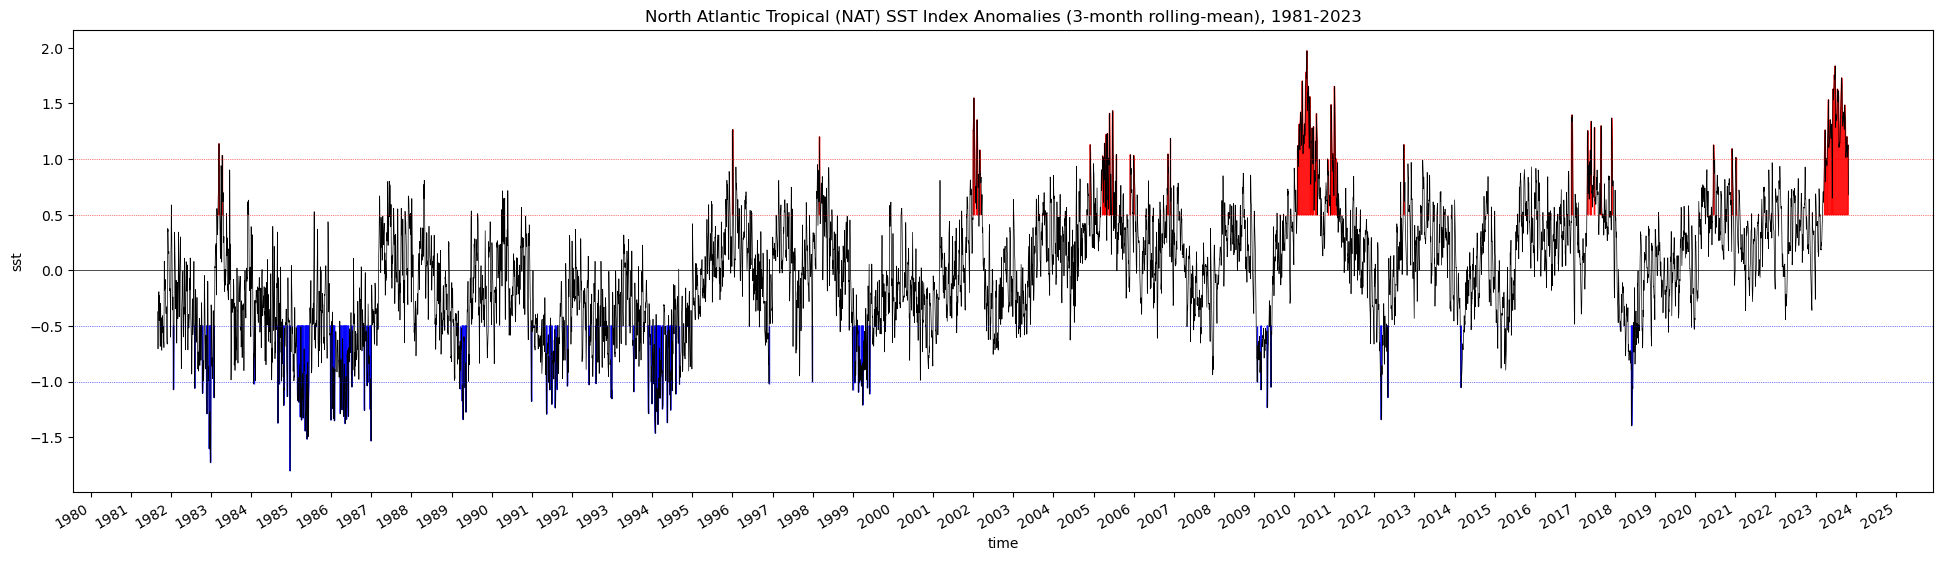

In [26]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    NAT_index.time.data, 
    NAT_index.where(NAT_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    NAT_index.time.data,
    NAT_index.where(NAT_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
NAT_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("North Atlantic Tropical (NAT) SST Index Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_NAT_SST_Index_Anomalies_1981-2023).png')

In [14]:
"""South Atlantic Tropical (SAT) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/sat.php
The SAT SST anomaly index is an indicator of the surface temperatures in a 
broad swath of the tropical South Atlantic Ocean. 
It is calculated with SSTs in the box 15°W - 5°E, 20°S - 5°S."""
# subset data for SAT1&2 # NB. longitude values are in degrees east
SST_SAT1 = SST.sel(lat=slice(-20, -5), lon=slice(345, 360))
SST_SAT2 = SST.sel(lat=slice(-20, -5), lon=slice(0, 5))

# group the dataset by month
SST_SAT1_mon = SST_SAT1.groupby("time.month")
SST_SAT2_mon = SST_SAT2.groupby("time.month")

# find the monthly climatology in the SAT1&2 region
SST_SAT1_clim = SST_SAT1_mon.mean(dim="time")
SST_SAT2_clim = SST_SAT2_mon.mean(dim="time")

# find the monthly anomaly in the SAOD region
SST_SAT1_anom = SST_SAT1_mon - SST_SAT1_clim
SST_SAT2_anom = SST_SAT2_mon - SST_SAT2_clim

# convert Dask to xarray dataset and load into memory; 
# will sit at 0% for a while, then speed up
# from dask.diagnostics import ProgressBar
with ProgressBar():
    SST_SAT1_anom.load() 
    SST_SAT2_anom.load()
    
# calculate the weights using the latitude coordinates
weights_SAT1 = np.cos(np.deg2rad(SST_SAT1_anom.lat))
weights_SAT2 = np.cos(np.deg2rad(SST_SAT2_anom.lat))

# take the area weighted average of anomalies 
SST_SAT1_anom_mean = SST_SAT1_anom.weighted(weights_SAT1).mean(dim=["lat", "lon"])
SST_SAT2_anom_mean = SST_SAT2_anom.weighted(weights_SAT2).mean(dim=["lat", "lon"])

# add together two parts of TSA
SST_SAT_anom_mean = SST_SAT1_anom_mean + SST_SAT2_anom_mean

# Calculate 'SAT index'-smooth using a centered 3 month running mean
SAT_index = SST_SAT_anom_mean.rolling(time=3, center=True).mean()

[########################################] | 100% Completed | 298.80 s
[########################################] | 100% Completed | 298.22 s


In [ ]:
# [########################################] | 100% Completed | 298.80 s
# [########################################] | 100% Completed | 298.22 s

In [15]:
SAT_index.to_netcdf('SAT_index.nc')

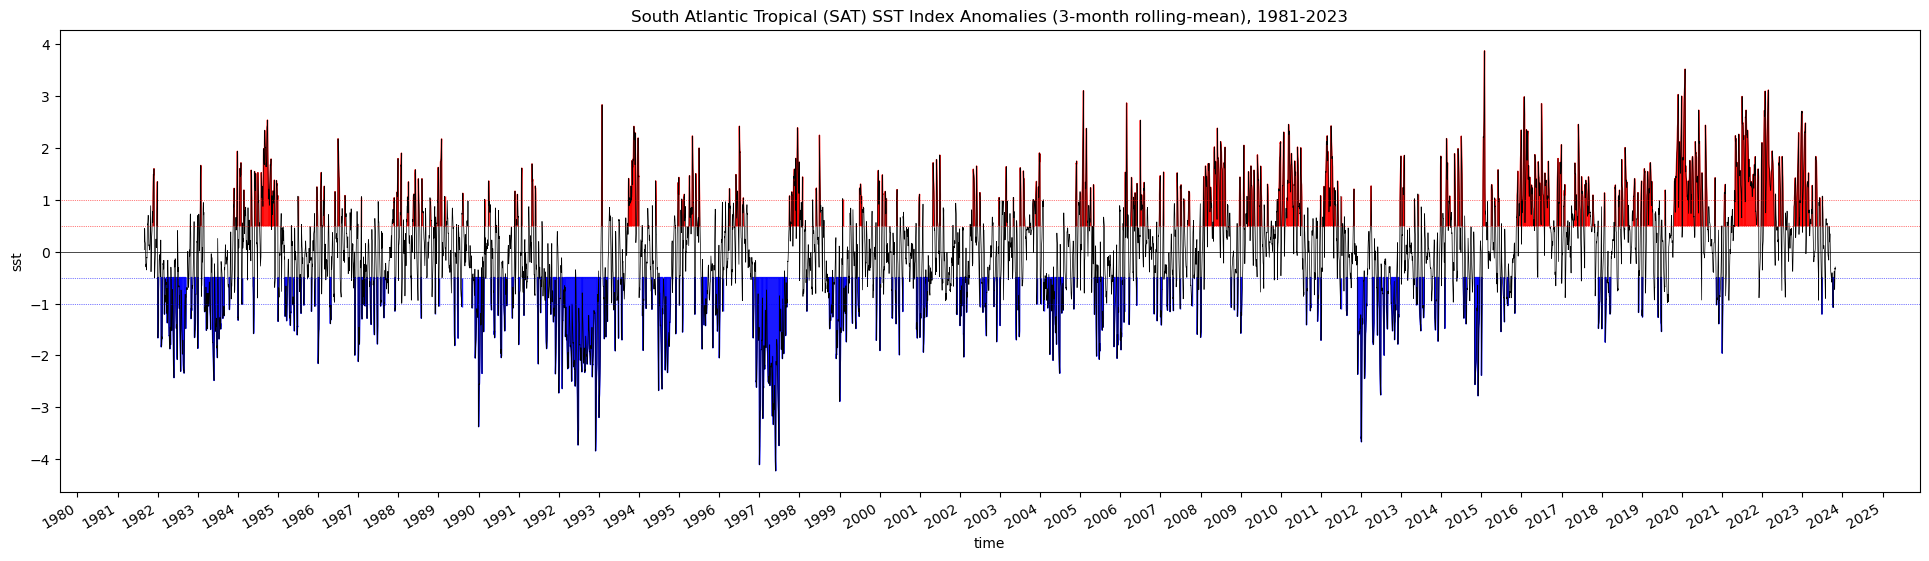

In [28]:
fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    SAT_index.time.data, 
    SAT_index.where(SAT_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    SAT_index.time.data,
    SAT_index.where(SAT_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
SAT_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("South Atlantic Tropical (SAT) SST Index Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_SAT_SST_Index_Anomalies_1981-2023).png')

In [16]:
# Perform subtraction (West - East)
SST_TASI_anom_mean = SST_NAT_anom_mean - SST_SAT_anom_mean

# Calculate 'SAOD index' - smooth using a centered 3 month running mean
TASI_index = SST_TASI_anom_mean.rolling(time=3, center=True).mean()

In [17]:
TASI_index.to_netcdf('TASI_index.nc')

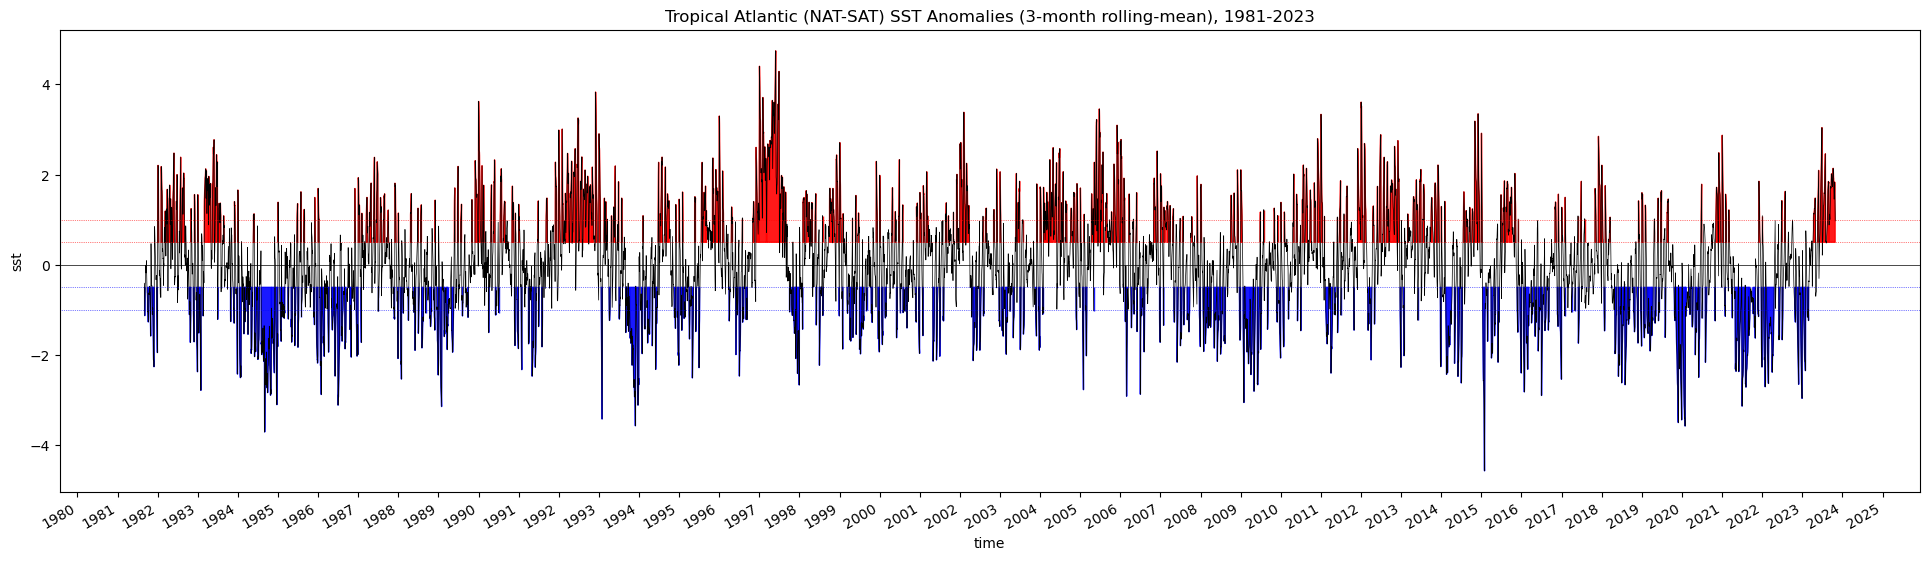

In [29]:
"""Tropical Atlantic (TASI) SST index
https://stateoftheocean.osmc.noaa.gov/sur/atl/tasi.php
The TASI SST anomaly index is an indicator of the meridional surface 
temperature gradient in the tropical Atlantic Ocean. 
It is calculated as the difference of the NAT and SAT indices (NAT-SAT)"""

fig = plt.figure(figsize=(24, 6))  

plt.fill_between(  # plot with color in peaks, troughs
    TASI_index.time.data, 
    TASI_index.where(TASI_index >= 1.0).data, 
    0.5,    
    color="red",  # color
    alpha=0.9,  # transparency value
)

plt.fill_between(
    TASI_index.time.data,
    TASI_index.where(TASI_index <= -1.0).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# plot the smoothed (3-month rolling) data
TASI_index.plot(color="black", linewidth=0.5)  

# add lines at x=0, and dotted lines at x= 0.5, 1.0 and x= -0.5, -1.0
plt.axhline(0, color="black", lw=0.5)  # add a black line at x=0

plt.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(1.0, color="red", linewidth=0.5, linestyle="dotted") 
plt.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted") 
plt.axhline(-1.0, color="blue", linewidth=0.5, linestyle="dotted") 

plt.title("Tropical Atlantic (NAT-SAT) SST Anomalies (3-month rolling-mean), 1981-2023")
# Set the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('Magda_SST_quicklooks/James_TASI_SST_Anomaly_Index_1981-2023).png')